# EDA

## TODO

* Write something to fetch data from the website
* Write something to read in the data and split into a train and test set.

## Imports

In [62]:
from collections import Counter
import os
import email
import email.policy

import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [21]:
DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("data", "spam")
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")
RANDOM_STATE = 42

In [3]:
ham_filenames = [name for name in os.listdir(HAM_DIR)]

In [4]:
len(ham_filenames)

2500

In [5]:
spam_filenames = [name for name in os.listdir(SPAM_DIR)]

In [6]:
len(spam_filenames)

500

In [7]:
def load_email(is_spam, filename, spam_path=SPAM_PATH):
    directory = "spam" if is_spam else "easy_ham"
    
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [8]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]

In [9]:
print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [10]:
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

In [11]:
print(spam_emails[6].get_content().strip())

Help wanted.  We are a 14 year old fortune 500 company, that is
growing at a tremendous rate.  We are looking for individuals who
want to work from home.

This is an opportunity to make an excellent income.  No experience
is required.  We will train you.

So if you are looking to be employed from home with a career that has
vast opportunities, then go:

http://www.basetel.com/wealthnow

We are looking for energetic and self motivated people.  If that is you
than click on the link and fill out the form, and one of our
employement specialist will contact you.

To be removed from our link simple go to:

http://www.basetel.com/remove.html


4139vOLW7-758DoDY1425FRhM1-764SMFc8513fCsLl40


## Create train / test sets

In [16]:
X = np.array(ham_emails + spam_emails, dtype=object)

In [18]:
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

## Analyse train set

* Subject is probably important
* capital letters:small letters ratio is probably import
* email length is probably important
* email type is probably important
* word content is probably important
* Attachments could be important

In [12]:
def get_email_structure(email):
    if isinstance(email, str):
        return email

    payload = email.get_payload()
    
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

In [13]:
def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

In [47]:
train_ham_emails = X_train[y_train == 0]
train_spam_emails = X_train[y_train == 1]

### Investigate email type

In [53]:
ham_counter = structures_counter(train_ham_emails)

In [51]:
spam_counter = structures_counter(train_spam_emails)

In [63]:
def plot_content_bar_chart(counter):
    keys = counter.keys()
    y_pos = np.arange(len(keys))

    performance = [counter[k] for k in keys]

    plt.barh(y_pos, performance, align='center', alpha=0.4)
    plt.yticks(y_pos, keys)
    plt.xlabel('Counts per key')
    plt.title('How fast do you want to go today?')

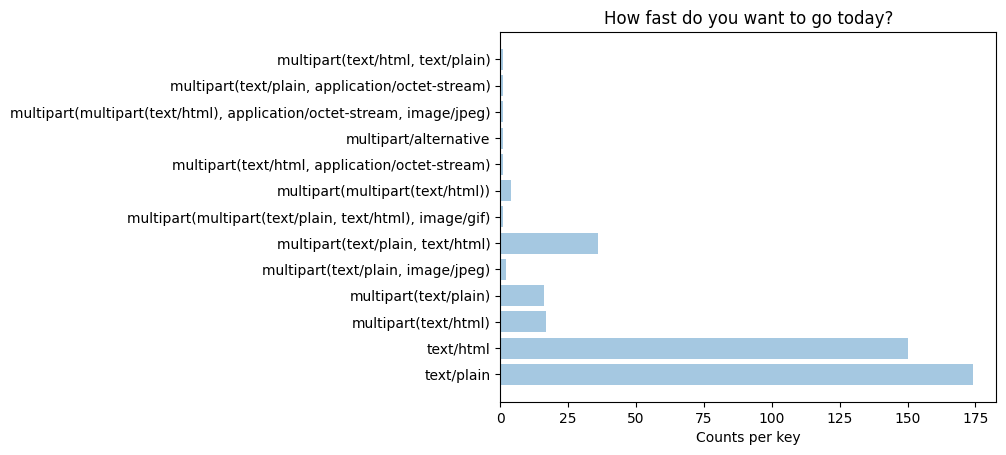

In [64]:
plot_content_bar_chart(spam_counter)

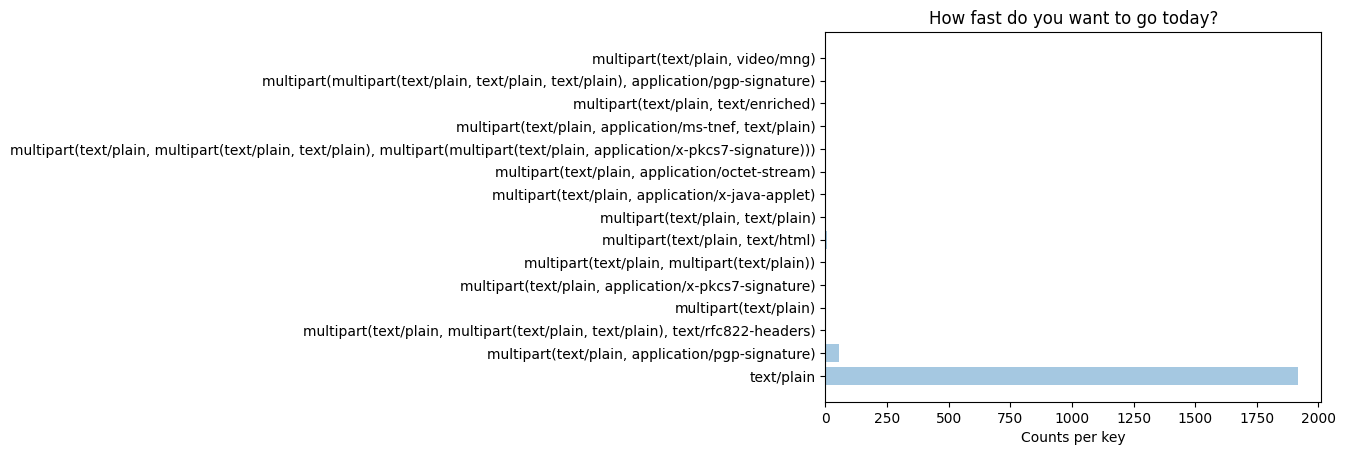

In [65]:
plot_content_bar_chart(ham_counter)

Spam emails have a much more varied content type, especially html.  Ham emails seem to be mainly plain text and some are multipart(text/plain, application/pgp-signiture).

### Check email subjects

In [68]:
train_ham_emails[0].keys()

['Return-Path',
 'Delivered-To',
 'Received',
 'Received',
 'Received',
 'Received',
 'Delivered-To',
 'Received',
 'Received',
 'To',
 'Subject',
 'Message-Id',
 'From',
 'Sender',
 'Errors-To',
 'X-Beenthere',
 'X-Mailman-Version',
 'Precedence',
 'List-Help',
 'List-Post',
 'List-Subscribe',
 'List-Id',
 'List-Unsubscribe',
 'List-Archive',
 'Date']

In [69]:
train_ham_emails[0]["Subject"]

"Re: Hanson's Sept 11 message in the National Review"

In [73]:
train_spam_emails[20]["Subject"]

'[ILUG-Social] HELLO'

### Ratio capital/small letters/words